# Image Classification (Grayscale)
# Convolutional Neural Networks Practice Project
## (Keras | Tensorflow)
_
### Clasificación de imágenes (Escala de grises)
**Práctica de CNN**


In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---

## Data | Datos

**The data is the classic MNIST images dataset. This is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images**

_


Los datos son el clásico dataset de imágenes MNIST. Este es un dataset de 60 000 imágenes en escala de grises de 28x28 de 10 dígitos, junto con un set de prueba de 10 000 imágenes


In [4]:
from tensorflow.keras.datasets import mnist

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
type(x_train)

numpy.ndarray

In [9]:
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


In [10]:
single_example = x_train[0]

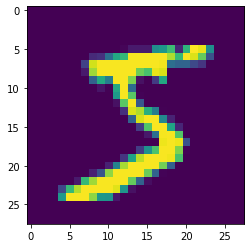

In [11]:
plt.imshow(single_example);

_

**Let's make sure Keras knows this is a classification problem transforming the y label into categorical data**

Hay que asegurarse que Keras sepa que este es un problema de clasificación transformando y en datos categóricos

In [14]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [15]:
y_train.shape

(60000,)

In [13]:
from tensorflow.keras.utils import to_categorical

In [19]:
y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)

In [20]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

_

**Scaling | Escalamiento**

In [21]:
single_example.max()

255

In [22]:
single_example.min()

0

**Since we are dealing with images  we can assume we are expecting values always between 0 and 255 and, a simple scaling  can be done just by dividing  255**

Dado que estamos tratando con imágenes podemos suponer que estamos esperando valores siempre entre 0 y 255 y, se puede hacer un escalamiento simplemente dividiendo entre 255

In [23]:
x_train = x_train/255
x_test = x_test/255

In [24]:
scaled_example = x_train[0]

In [25]:
pd.DataFrame(scaled_example)

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.686275,0.101961,0.650980,1.000000,0.968627,0.498039,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.117647,0.141176,...,0.882353,0.674510,0.992157,0.949020,0.764706,0.250980,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.192157,0.933333,0.992157,...,0.364706,0.321569,0.321569,0.219608,0.152941,0.000000,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.070588,0.858824,0.992157,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.313725,0.611765,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


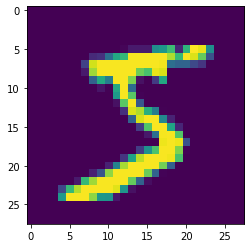

In [26]:
plt.imshow(scaled_example)

_

**Reshaping**

**We need to add one more dimension to let the network know we are dealing with a single color channel because the images are in black and white**

Necesitamos agregar una dimensión para que la red sepa que estamos trabajando con un canal simple de color porque las imágenes son en blanco y negro

In [28]:
x_train.shape

(60000, 28, 28)

In [29]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

---
## Model | Modelo


In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [33]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28,28,1), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [34]:
from tensorflow.keras.callbacks import EarlyStopping

In [35]:
early_stop = EarlyStopping(monitor='val_loss', patience=1)

In [36]:
model.fit(x_train, y_cat_train, epochs=10, validation_data=(x_test, y_cat_test), callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2909 - accuracy: 0.9147 - val_loss: 0.0507 - val_accuracy: 0.9830
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0482 - accuracy: 0.9851 - val_loss: 0.0487 - val_accuracy: 0.9839
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0280 - accuracy: 0.9918 - val_loss: 0.0435 - val_accuracy: 0.9862
Epoch 4/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0178 - accuracy: 0.9945 - val_loss: 0.0479 - val_accuracy: 0.9841


---
## Performance Evaluation | Evaluación del desempeño

In [37]:
metrics = pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.139562,0.958583,0.050664,0.9830
1,0.047530,0.985033,0.048697,0.9839
2,0.030552,0.990567,0.043507,0.9862
3,0.020530,0.993617,0.047933,0.9841


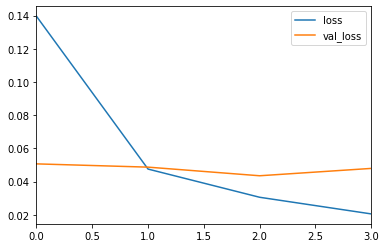

In [39]:
metrics[['loss', 'val_loss']].plot()

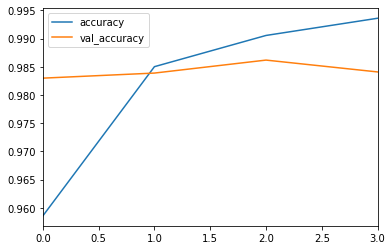

In [40]:
metrics[['accuracy', 'val_accuracy']].plot()

In [41]:
model.metrics_names

['loss', 'accuracy']

In [42]:
model.evaluate(x_test, y_cat_test, verbose=0)

[0.04793332517147064, 0.9840999841690063]

In [43]:
from sklearn.metrics import classification_report, confusion_matrix

In [50]:
predictions = np.argmax(model.predict(x_test), axis=-1)

In [51]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.98      0.99      0.98       982
           5       0.96      0.99      0.98       892
           6       1.00      0.95      0.98       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.96      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [54]:
print(confusion_matrix(y_test, predictions))

[[ 972    0    2    1    0    2    0    1    1    1]
 [   0 1131    3    1    0    0    0    0    0    0]
 [   1    0 1021    1    1    0    0    7    1    0]
 [   0    0    4  997    0    7    0    1    0    1]
 [   0    0    0    0  977    0    0    0    0    5]
 [   1    0    0    4    0  887    0    0    0    0]
 [   9    4    0    0    9   20  914    0    2    0]
 [   0    1    4    0    0    0    0 1018    1    4]
 [   4    1    4    5    5    4    2    7  936    6]
 [   0    2    0    3   10    3    0    3    0  988]]


---
## Prediction on a new image

**Predicción sobre una nueva imagen**

In [63]:
x_test[0].shape

(28, 28, 1)

In [65]:
my_new_number = x_test[0]

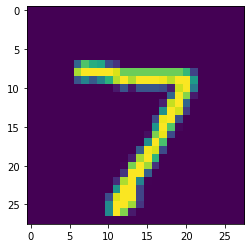

In [66]:
plt.imshow(my_new_number.reshape(28,28))

In [71]:
#num_images, width, heigth, color_channels
np.argmax(model.predict(my_new_number.reshape(1,28,28,1)), axis=-1)

array([7], dtype=int64)

## Model performed really well! :D

**El modelo tuvo un buen desempeño**